In [234]:
import osmnx as ox
import geopandas as gpd
import os
import pandas as pd
from utils.osmgraph import GraphFunctions
from utils.spaitalShape import Point, OdPair, Box
import numpy as np
import plotly.graph_objects as go
import plotly
from shapely.geometry import MultiPoint

In [18]:
ox.__version__

'0.16.1'

In [19]:
roadRestrictionFilefolder = 'data/restrictionByMnDoT/'

In [45]:
#read gdfs
gdf = None
for root, dirs, files in os.walk(roadRestrictionFilefolder):
    for file in files:
        if file[-5] == '7' or file[-5] == '5':
            filepath = os.path.join(root, file)
            if gdf is None:
                gdf = ox.geometries.geometries_from_xml(filepath)
            else:
                gdf = gpd.GeoDataFrame(pd.concat([gdf, ox.geometries.geometries_from_xml(filepath)], ignore_index=True), crs=gdf.crs)   
roadRestriction = gdf.dropna(subset=['length_m']).reset_index(drop=True)         

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
roadRestriction.head()

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,nodes,DELETE,sort,from_tm,to_tm,sll_zone,name,from_rp,to_rp,description,posting_ton,length_m,geometry,sll_znoe,id
0,way/-97459856,-97459856,way,"[-99379200, -99380400, -99378360, -99378840, -...",5,0300000000000117-I,0.00000000000,1.79800000000,CENTRAL,MN 117 (7 ton),0+00.000,1+00.797,MN 117 from ND-MN state line to Jct. MN 27,7,2894.31901029000,"LINESTRING (-96.63923 45.76899, -96.63373 45.7...",NaN,NaN
1,way/-97461512,-97461512,way,"[-111202800, -111203280, -111203400, -11120244...",13,0300000000000007-I,0.00000000000,24.08600000000,CENTRAL,MN 7 (7 ton),0+00.000,24+00.173,MN 7 from Jct. MN 28 to Golf Club Road,7,38762.59877150000,"LINESTRING (-96.70002 45.55872, -96.70002 45.5...",NaN,NaN
2,way/-97460072,-97460072,way,"[-111470112, -111468672, -111470832, -11146771...",23,0300000000000022-I,157.15400000000,162.61500000000,CENTRAL,MN 22 (7 ton),156+00.901,162+00.372,MN 22 from MN 55 (Eden Valley) to Stearns CSAH-9,7,8788.95858247000,"LINESTRING (-94.54656 45.32252, -94.54657 45.3...",NaN,NaN
3,way/-97345512,-97345512,way,"[-112343096, -112333616, -112333736, -11233385...",1,0300000000000210-I,218.62500000000,227.85500000000,NORTH-CENTRAL,MN 210 (7 ton),218+00.558,227+000.790,MN 210 from MN 45 (Carlton) to west MN 23 (Dul...,7,14853.70816620000,"LINESTRING (-92.42485 46.66397, -92.42266 46.6...",NaN,NaN
4,way/-97345728,-97345728,way,"[-114610464, -114611064, -114610584, -11461070...",16,0300000000000123-I,0.00000000000,8.04100000000,NORTH-CENTRAL,MN 123 (7 ton),0+00.000,8+00.054,MN 123 from south Jct. MN 23 (Sandstone) to no...,7,12941.01403050000,"LINESTRING (-92.87985 46.12517, -92.87555 46.1...",NaN,NaN


In [48]:
distance = 70
distance = distance*1609.34 # mile->km
bbox = ox.utils_geo.bbox_from_point((44.9827, -93.22025), dist=distance, project_utm = False, return_crs = False)
boundingBox = Box(bbox[-1], bbox[-2], bbox[-3], bbox[-4])
print(boundingBox)

-94.65258355209289,-91.7879164479071,43.96958146789451,45.995818532105496


c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
osmGraphInBbox = GraphFunctions.extractGraphOf(boundingBox)

Graphs/GraphDataInBbox-94.65258355209289,-91.7879164479071,43.96958146789451,45.995818532105496
reloading graph..


In [51]:
nodes, edges = osmGraphInBbox.graphToGdfs()

In [55]:
len(nodes)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


223490

In [56]:
len(edges)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


570087

In [196]:
len(roadRestriction)

28

In [198]:
type(roadRestriction)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



geopandas.geodataframe.GeoDataFrame

In [199]:
def isCoveredByBbox(arraylike):
    return arraylike['geometry'].covered_by(boundingBox.polygon())

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [200]:
roadRestriction['isCovered']  = roadRestriction.apply(isCoveredByBbox, axis=1)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [202]:
roadRestrictionCovered = roadRestriction[roadRestriction['isCovered']]

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [203]:
len(roadRestrictionCovered)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



10

In [214]:
roadRestrictionCovered = roadRestrictionCovered.drop(labels='nodes', axis=1)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [218]:
roadRestrictionCovered.to_file("statistical data/roadRestriction.geojson", driver='GeoJSON')

In [208]:
pathListInBbox = list(roadRestrictionCovered['geometry'])

In [209]:
len(pathListInBbox)

10

In [210]:
len(list(pathListInBbox[0].coords))

53

In [490]:
bridgeRestrictionDF = pd.read_excel('data/Bridge_Restrictions.xlsx')

In [77]:
bridgeRestrictionDF.head()

,BRKEY,ON_UNDER,FACILITY,ROADWAY_NAME,FEATURE_INTERSECTED,DISTRICT,COUNTY,CITY - TOWNSHIP,LOCATION DESC,OWNER,...,PERMIT_CODE_48K_DESC,PERMIT_CODE_60K_CODE,PERMIT_CODE_60K_DESC,PERMIT_CODE_72K_CODE,PERMIT_CODE_72K_DESC,VEHICLE_POSTED_CAPACITY,SEMI_POSTED_CAPACITY,DOUBLE_POSTED_CAPACITY,LATITUDE,LONGITUDE
0,01002,1,MN 200,MN 200,HILL LAKE CHANNEL,01,AITKIN,HILL LAKE (TOWNSHIP OF),0.8 MI E OF JCT TH 169,STATE HIGHWAY AGENCY,...,NO RESTRICTION,1,NO RESTRICTION,1,NO RESTRICTION,NaN,NaN,NaN,46.987514,-93.588928
1,01004,1,US 169,US 169,MISSISSIPPI RIVER,03,AITKIN,MORRISON (TOWNSHIP OF),2.9 MI N OF N JCT TH 210,STATE HIGHWAY AGENCY,...,NO RESTRICTION,1,NO RESTRICTION,1,NO RESTRICTION,NaN,NaN,NaN,46.651128,-93.612747
2,01005,1,MN 210,MN 210,RIPPLE RIVER,03,AITKIN,AITKIN,0.2 MI E OF W JCT TH 169,STATE HIGHWAY AGENCY,...,NO RESTRICTION,1,NO RESTRICTION,1,NO RESTRICTION,NaN,NaN,NaN,46.533364,-93.702469
3,01006,1,MN 210,MN 210,RICE RIVER,03,AITKIN,MORRISON (TOWNSHIP OF),7.4 MI NE OF JCT TH 169,STATE HIGHWAY AGENCY,...,NO RESTRICTION,1,NO RESTRICTION,1,NO RESTRICTION,NaN,NaN,NaN,46.598764,-93.612883
4,01007,1,MN 210,MN 210,BNSF RR,01,AITKIN,MCGREGOR,0.5 MI E OF W JCT TH 65,STATE HIGHWAY AGENCY,...,NO RESTRICTION,1,NO RESTRICTION,1,NO RESTRICTION,NaN,NaN,NaN,46.609233,-93.307086


In [491]:
bridgeRestrictionDF['LATITUDE'] = bridgeRestrictionDF['LATITUDE'].fillna(method='ffill')

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [492]:
bridgeRestrictionDF['LONGITUDE'] = bridgeRestrictionDF['LONGITUDE'].fillna(method='ffill')

In [493]:
bridgeRestrictionDF['VERTICAL_CLR_RD1_FEET']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
24381     NaN
24382    18.0
24383    18.0
24384     NaN
24385    17.4
Name: VERTICAL_CLR_RD1_FEET, Length: 24386, dtype: float64

In [494]:
values = {"VERTICAL_CLR_RD1_FEET": 100, "VERTICAL_CLR_RD2_FEET": 100, "HORIZONTAL_CLR_RD1_FEET": 100, "HORIZONTAL_CLR_RD2_FEET": 100}
bridgeRestrictionDF = bridgeRestrictionDF.fillna(value=values)

In [498]:
bridgeRestrictionDF.loc[2094]

BRKEY                          19555
ON_UNDER                           2
FACILITY                         NaN
ROADWAY_NAME                 77th St
FEATURE_INTERSECTED              NaN
DISTRICT                         NaN
COUNTY                           NaN
CITY - TOWNSHIP                  NaN
LOCATION DESC                    NaN
OWNER                            NaN
VERTICAL_CLR_RD1_FEET           11.8
VERTICAL_CLR_RD2_FEET          100.0
HORIZONTAL_CLR_RD1_FEET         19.8
HORIZONTAL_CLR_RD2_FEET        100.0
PERMIT_CODE_48K_CODE             NaN
PERMIT_CODE_48K_DESC             NaN
PERMIT_CODE_60K_CODE             NaN
PERMIT_CODE_60K_DESC             NaN
PERMIT_CODE_72K_CODE             NaN
PERMIT_CODE_72K_DESC             NaN
VEHICLE_POSTED_CAPACITY          NaN
SEMI_POSTED_CAPACITY             NaN
DOUBLE_POSTED_CAPACITY           NaN
LATITUDE                   44.838061
LONGITUDE                 -93.016022
Name: 2094, dtype: object

In [499]:
bridgeRestriction = bridgeRestrictionDF[(bridgeRestrictionDF['PERMIT_CODE_72K_CODE']=='X') 
                    | ((bridgeRestrictionDF['VERTICAL_CLR_RD1_FEET'] < 13.5) & (bridgeRestrictionDF['VERTICAL_CLR_RD1_FEET'] >0.1 ))
                    | ((bridgeRestrictionDF['VERTICAL_CLR_RD2_FEET'] < 13.5) & (bridgeRestrictionDF['VERTICAL_CLR_RD2_FEET'] >0.1 ))
                    | ((bridgeRestrictionDF['HORIZONTAL_CLR_RD1_FEET'] < 8.5) & (bridgeRestrictionDF['HORIZONTAL_CLR_RD1_FEET'] >0.1 ))
                    | ((bridgeRestrictionDF['HORIZONTAL_CLR_RD2_FEET'] < 8.5) & (bridgeRestrictionDF['HORIZONTAL_CLR_RD2_FEET'] >0.1 ))]

In [500]:
bridgeRestriction.loc[2094]

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



BRKEY                          19555
ON_UNDER                           2
FACILITY                         NaN
ROADWAY_NAME                 77th St
FEATURE_INTERSECTED              NaN
DISTRICT                         NaN
COUNTY                           NaN
CITY - TOWNSHIP                  NaN
LOCATION DESC                    NaN
OWNER                            NaN
VERTICAL_CLR_RD1_FEET           11.8
VERTICAL_CLR_RD2_FEET          100.0
HORIZONTAL_CLR_RD1_FEET         19.8
HORIZONTAL_CLR_RD2_FEET        100.0
PERMIT_CODE_48K_CODE             NaN
PERMIT_CODE_48K_DESC             NaN
PERMIT_CODE_60K_CODE             NaN
PERMIT_CODE_60K_DESC             NaN
PERMIT_CODE_72K_CODE             NaN
PERMIT_CODE_72K_DESC             NaN
VEHICLE_POSTED_CAPACITY          NaN
SEMI_POSTED_CAPACITY             NaN
DOUBLE_POSTED_CAPACITY           NaN
LATITUDE                   44.838061
LONGITUDE                 -93.016022
Name: 2094, dtype: object

In [501]:
len(bridgeRestriction)

957

In [502]:
def isInBbox(arraylike):
    point = Point(arraylike['LONGITUDE'], arraylike['LATITUDE'])
    if point.isContained(boundingBox):
        return True
    return False

In [503]:
bridgeRestriction['inBbox'] = bridgeRestriction.apply(isInBbox, axis=1)

<ipython-input-503-71c82ce07507>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [504]:
bridgeRestriction.head()

,BRKEY,ON_UNDER,FACILITY,ROADWAY_NAME,FEATURE_INTERSECTED,DISTRICT,COUNTY,CITY - TOWNSHIP,LOCATION DESC,OWNER,...,PERMIT_CODE_60K_CODE,PERMIT_CODE_60K_DESC,PERMIT_CODE_72K_CODE,PERMIT_CODE_72K_DESC,VEHICLE_POSTED_CAPACITY,SEMI_POSTED_CAPACITY,DOUBLE_POSTED_CAPACITY,LATITUDE,LONGITUDE,inBbox
12,01502,1,CSAH 22,CSAH 22 (400TH ST),WAKEFIELD BROOK,03,AITKIN,AITKIN (TOWNSHIP OF),1.2 MI W OF JCT CSAH 24,COUNTY HIGHWAY AGENCY,...,1,NO RESTRICTION,X,DENIED,NaN,NaN,NaN,46.593289,-93.777664,False
165,02502,1,CSAH 28,CSAH 28,SEELYE BROOK,METRO,ANOKA,ST FRANCIS,0.1 MI W OF JCT CR 71,COUNTY HIGHWAY AGENCY,...,X,DENIED,X,DENIED,32.0,NaN,NaN,45.402922,-93.417939,True
288,02J26,1,MSAS 143,LAKES PKWY NE,LAKE CHANNEL,METRO,ANOKA,BLAINE,0.9 MI E OF JCT CSAH 52,CITY OR MUNICIPAL HIGHWA,...,X,DENIED,X,DENIED,NaN,NaN,NaN,45.192647,-93.195672,True
290,02J28,1,MUN 1053,EDISON ST,LAKE CHANNEL,METRO,ANOKA,BLAINE,0.1 MI S OF LAKE BLVD,CITY OR MUNICIPAL HIGHWA,...,X,DENIED,X,DENIED,NaN,NaN,NaN,45.180892,-93.195700,True
324,03504,1,T 676,150TH AVE,BUFFALO RIVER,04,BECKER,CUBA (TOWNSHIP OF),1.0 MI N OF JCT CSAH 12,TOWN OR TOWNSHIP HIGHWAY,...,1,NO RESTRICTION,X,DENIED,NaN,NaN,NaN,46.948506,-96.090844,False


In [505]:
print(boundingBox)

-94.65258355209289,-91.7879164479071,43.96958146789451,45.995818532105496


c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [506]:
bridgeRestriction = bridgeRestriction[bridgeRestriction['inBbox']]

In [507]:
len(bridgeRestriction)

326

In [508]:
bridgeRestriction.describe(include=[np.number])

,VERTICAL_CLR_RD1_FEET,VERTICAL_CLR_RD2_FEET,HORIZONTAL_CLR_RD1_FEET,HORIZONTAL_CLR_RD2_FEET,VEHICLE_POSTED_CAPACITY,SEMI_POSTED_CAPACITY,DOUBLE_POSTED_CAPACITY,LATITUDE,LONGITUDE
count,326.000000,326.000000,326.000000,326.000000,185.000000,137.000000,137.000000,326.000000,326.000000
mean,75.748466,95.103988,28.976687,94.776380,25.281081,35.591241,35.605839,44.760189,-93.330674
std,39.341081,20.294527,12.947608,19.799816,9.188658,6.648258,6.669022,0.504273,0.607174
min,7.600000,0.000000,1.000000,0.000000,3.000000,14.000000,14.000000,43.974286,-94.639983
25%,13.400000,100.000000,22.325000,100.000000,20.000000,32.000000,32.000000,44.325854,-93.702982
50%,100.000000,100.000000,28.000000,100.000000,26.000000,40.000000,40.000000,44.837477,-93.275997
75%,100.000000,100.000000,32.000000,100.000000,32.000000,40.000000,40.000000,44.993133,-93.004648
max,100.000000,100.000000,100.000000,100.000000,40.000000,40.000000,40.000000,45.976231,-91.805811


In [510]:
bridgeRestriction['ON_UNDER']

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



165      1
288      1
290      1
509      1
510      1
        ..
24342    2
24344    2
24356    2
24374    1
24375    1
Name: ON_UNDER, Length: 326, dtype: object

In [514]:
len(bridgeRestriction)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



326

In [515]:
bridgeRestriction[bridgeRestriction['ON_UNDER']!='1']

,BRKEY,ON_UNDER,FACILITY,ROADWAY_NAME,FEATURE_INTERSECTED,DISTRICT,COUNTY,CITY - TOWNSHIP,LOCATION DESC,OWNER,...,PERMIT_CODE_60K_CODE,PERMIT_CODE_60K_DESC,PERMIT_CODE_72K_CODE,PERMIT_CODE_72K_DESC,VEHICLE_POSTED_CAPACITY,SEMI_POSTED_CAPACITY,DOUBLE_POSTED_CAPACITY,LATITUDE,LONGITUDE,inBbox
2094,19555,2,NaN,77th St,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.838061,-93.016022,True
2156,19821,C,NaN,I 35 SB ON RAMP FROM I 494,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.858094,-93.146122,True
2698,2266,2,NaN,MUN 27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.115097,-93.717742,True
3058,2441,2,NaN,W RIVER PKWY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.963919,-93.222656,True
3683,27097,C,NaN,ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.899792,-93.247231,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24330,R0831,2,NaN,GLUMACK DR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.881031,-93.205728,True
24336,R0834,2,NaN,TERMINAL 1 RD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.883170,-93.210750,True
24342,R0837,2,NaN,GLUMACK RD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.883420,-93.210420,True
24344,R0838,2,NaN,GLUMACK RD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.882780,-93.210940,True


In [517]:
bridgeRestriction.to_csv("statistical data/bridgeRestriction.csv", index=False)

In [521]:
onbridge = bridgeRestriction[bridgeRestriction['ON_UNDER']=='1']

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [522]:
underbridge = bridgeRestriction[bridgeRestriction['ON_UNDER']!='1']

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [524]:
len(onbridge), len(underbridge)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(240, 86)

In [525]:
onbridgePointList = list(zip(list(onbridge['LATITUDE']), list(onbridge['LONGITUDE'])))
underbridgePointList = list(zip(list(underbridge['LATITUDE']), list(underbridge['LONGITUDE'])))

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [526]:
GraphFunctions.plotPointList({'onbridge nodes':  onbridgePointList, 'underbridge nodes': underbridgePointList}, ['red', 'green'], 'test.html')

green


c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [160]:
trajList = []
for i in pathListInBbox:
    trajList.append(list(i.coords))
print(len(trajList)), print(len(trajList[0]))

10
53


(None, None)

In [161]:
print(trajList[0])

[(-94.54655583, 45.32252174), (-94.54656984, 45.32390502), (-94.54655619, 45.32427189), (-94.54657932, 45.32512165), (-94.54659109, 45.32598824), (-94.54659314, 45.32718583), (-94.5465619, 45.32811682), (-94.54655397, 45.3283355), (-94.54651701, 45.32935598), (-94.54641734, 45.33291583), (-94.5462951, 45.33468286), (-94.54624518, 45.33604311), (-94.54613328, 45.33994672), (-94.54650922, 45.36152701), (-94.54684036, 45.36723391), (-94.54677746, 45.36798637), (-94.54646379, 45.36833718), (-94.54643228, 45.36837194), (-94.54587602, 45.36864668), (-94.54515965, 45.36873289), (-94.53913402, 45.36884577), (-94.53904943, 45.36888183), (-94.53850917, 45.36911495), (-94.53812391, 45.36947598), (-94.53786733, 45.37015453), (-94.53780221, 45.37106455), (-94.53755982, 45.37186893), (-94.53708973, 45.37220832), (-94.53654328, 45.3723822), (-94.53559427, 45.3724122), (-94.53480911, 45.37243702), (-94.53421645, 45.3725845), (-94.53375401, 45.37288326), (-94.53346826, 45.37340019), (-94.53350677, 45.3

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [169]:
GraphFunctions.plotTrajList(trajList, 'red', 'restrictedPath', 'restrictedPath.html',1)

red
red
red
red
red
red
red
red
red


In [170]:
GraphFunctions.extractElevation(nodes, edges, boundingBox)

In [171]:
len(edges)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



570087

In [172]:
edges.head()

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,osmid,oneway,lanes,ref,name,highway,maxspeed,access,length,geometry,...,tunnel,junction,service,width,area,u,v,key,uElevation,vElevation
0,18276018,False,2,CR 23,County Road 23,tertiary,55 mph,yes,621.703,"LINESTRING (-92.31899 44.19406, -92.31835 44.1...",...,NaN,NaN,NaN,NaN,NaN,187638945,188359345,0,328.57758,335.17166
1,18277445,False,2,CR 38,County Road 38,tertiary,55 mph,yes,924.434,"LINESTRING (-92.31899 44.19406, -92.32066 44.1...",...,NaN,NaN,NaN,NaN,NaN,187638945,187638954,0,328.57758,328.04327
2,148007759,False,NaN,NaN,80th Avenue Northeast,residential,NaN,yes,1554.238,"LINESTRING (-92.31899 44.19406, -92.31898 44.1...",...,NaN,NaN,NaN,NaN,NaN,187638945,188370223,0,328.57758,330.20117
3,18275726,False,NaN,NaN,T-181,residential,NaN,NaN,1603.761,"LINESTRING (-92.33058 44.19410, -92.33060 44.1...",...,NaN,NaN,NaN,NaN,NaN,187638954,188359837,0,328.04327,322.98657
4,18277445,False,2,CR 38,County Road 38,tertiary,55 mph,yes,924.434,"LINESTRING (-92.33058 44.19410, -92.32908 44.1...",...,NaN,NaN,NaN,NaN,NaN,187638954,187638945,0,328.04327,328.57758


In [173]:
type(edges['geometry'])

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



geopandas.geoseries.GeoSeries

In [180]:
import shapely.geometry


class Point:
    def __init__(self, x, y):
        '''
        x: lon
        y: lat
        '''
        self.x = x
        self.y = y

    def xy(self):
        return (self.x, self.y)

    def yx(self):
        return (self.y, self.x)

    def isContained(self, box):
        return box.contains(self)
    
    def geom(self):
        return shapely.geometry.Point(self.x, self.y)

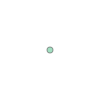

In [185]:
Point(-92.318352,44.194058).geom()

In [184]:
edges.loc[0,'geometry'].intersects(Point(-92.318352,44.194058).geom())

True

In [183]:
print(edges.loc[0,'geometry'])

LINESTRING (-92.318986 44.194057, -92.318352 44.194058, -92.31758499999999 44.19406, -92.31612130000001 44.1940543, -92.3138074 44.1940431, -92.31350430000001 44.1940481, -92.31324410000001 44.1940622, -92.31291450000001 44.1941014, -92.3125744 44.1941766, -92.3123593 44.1942416, -92.31212480000001 44.1943306, -92.31167000000001 44.194553, -92.311426 44.194697)


c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [187]:
len(restristedPointList)

240

In [191]:
restristedPointList[0]

(45.402922, -93.417939)

In [188]:
len(pathListInBbox)

10

In [190]:
type(pathListInBbox[0])

shapely.geometry.linestring.LineString

In [221]:
# save and read these two list
roadRestriction = gpd.read_file("statistical data/roadRestriction.geojson", drive='GeoJSON')
bridgeRestriction = pd.read_csv("statistical data/bridgeRestriction.csv")
len(roadRestriction), len(bridgeRestriction)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(10, 240)

In [222]:
roadRestriction.head()

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,unique_id,osmid,element_type,DELETE,sort,from_tm,to_tm,sll_zone,name,from_rp,to_rp,description,posting_ton,length_m,sll_znoe,id,isCovered,geometry
0,way/-97460072,-97460072,way,23,0300000000000022-I,157.15400000000,162.61500000000,CENTRAL,MN 22 (7 ton),156+00.901,162+00.372,MN 22 from MN 55 (Eden Valley) to Stearns CSAH-9,7,8788.95858247000,None,None,True,"LINESTRING (-94.54656 45.32252, -94.54657 45.3..."
1,way/-97510904,-97510904,way,25,0300000000000019-I,135.32300000000,137.83500000000,SOUTH,MN 19 (5 ton),135+00.180,137+00.730,MN 19 from 1.1 mi. east of MN 93 to MN 169,5,4042.46739736000,None,None,True,"LINESTRING (-93.88585 44.53323, -93.88573 44.5..."
2,way/-97457912,-97457912,way,3,0300000000000019-I,118.90300000000,132.77100000000,SOUTH,MN 19 (7 ton),118+00.770,132+00.680,MN 19 from E MN 5 (Gaylord) to 1.4 mi. west of...,7,22318.42842390000,None,None,True,"LINESTRING (-94.19763 44.55840, -94.19763 44.5..."
3,way/-97458128,-97458128,way,8,0300000000000099-I,32.17800000000,40.20600000000,SOUTH,MN 99 (7 ton),32+00.579,40+00.618,MN 99 from MN 13 to MN 21,7,12919.75963730000,None,None,True,"LINESTRING (-93.60549 44.38450, -93.60479 44.3..."
4,way/-97457336,-97457336,way,11,0300000000000021-I,2.79000000000,19.06500000000,SOUTH,MN 21 (7 ton),0+02.798,17+00.367,MN 21 from 0.26 miles north of Rice CSAH-46 to...,7,26192.25595430000,None,None,True,"LINESTRING (-93.30778 44.33093, -93.30873 44.3..."


In [527]:
len(bridgeRestriction)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



326

In [528]:
restristedPointList = MultiPoint(list(zip(list(bridgeRestriction['LONGITUDE']), list(bridgeRestriction['LATITUDE']))))

In [309]:
len(pathListInBbox)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



10

In [410]:
list(pathListInBbox[t].coords)

[(-93.14385298, 44.91120296),
 (-93.14399522, 44.91173556),
 (-93.14407279, 44.91204153),
 (-93.14409586, 44.91220077),
 (-93.14413911, 44.91253202),
 (-93.144128, 44.91353582),
 (-93.14417302, 44.91476452),
 (-93.14422154, 44.9153271),
 (-93.14426437, 44.91582666),
 (-93.14463086, 44.91940902),
 (-93.14480843, 44.9229511),
 (-93.14481073, 44.92370727),
 (-93.14490192, 44.92579563),
 (-93.14487477, 44.92602215),
 (-93.14481774, 44.92649789),
 (-93.14478936, 44.92660886),
 (-93.14474491, 44.92678605),
 (-93.14468615, 44.92701038),
 (-93.1446507, 44.92715075),
 (-93.14427025, 44.92798843),
 (-93.14373761, 44.92877227),
 (-93.14343477, 44.92912718),
 (-93.14309779, 44.92943628),
 (-93.14266106, 44.92979871),
 (-93.14240846, 44.92998038),
 (-93.1418958, 44.93029222),
 (-93.14136201, 44.9305625),
 (-93.14124477, 44.93061158),
 (-93.14053129, 44.93089697),
 (-93.14010244, 44.93103565),
 (-93.13968358, 44.93114334),
 (-93.13926466, 44.9312296),
 (-93.13871162, 44.93131363),
 (-93.13796927, 44

In [411]:
list(pathListInBbox[9].coords)

[(-93.14395816, 44.91068687),
 (-93.14399814, 44.91077083),
 (-93.14405596, 44.91089226),
 (-93.14429716, 44.91168566),
 (-93.14438062, 44.91203319),
 (-93.14442309, 44.91248669),
 (-93.14441796, 44.91281077),
 (-93.14455528, 44.91563275),
 (-93.14467178, 44.91677586),
 (-93.14493928, 44.91939961),
 (-93.14511767, 44.9229462),
 (-93.14510358, 44.92316678),
 (-93.14520764, 44.92580423),
 (-93.14512589, 44.92652001),
 (-93.14505805, 44.92678565),
 (-93.1450008, 44.92701078),
 (-93.14495061, 44.92720888),
 (-93.14456072, 44.92806458),
 (-93.14439886, 44.92830207),
 (-93.14399889, 44.92888897),
 (-93.14370454, 44.92916389),
 (-93.1436189, 44.92923832),
 (-93.14360038, 44.92925443),
 (-93.14358215, 44.92927029),
 (-93.14307187, 44.92971381),
 (-93.142473, 44.93014217),
 (-93.14202236, 44.9304803),
 (-93.14172093, 44.9306112),
 (-93.14111724, 44.93087302),
 (-93.14002068, 44.93120744),
 (-93.13901177, 44.93144273),
 (-93.1381171, 44.93157884),
 (-93.13757264, 44.93161102),
 (-93.13675767, 44

In [409]:
# remove the restricted paths (matched)
t = 8
pathListInBbox = list(roadRestrictionCovered['geometry'])
path = pathListInBbox[t].coords
x,y = zip(*path)
matchedNodes = ox.distance.get_nearest_nodes(osmGraphInBbox.graph, x, y)
matched = [matchedNodes[0]] 
for i in range(1, len(matchedNodes)):
    if matchedNodes[i] != matchedNodes[i-1]:
        matched.append(matchedNodes[i])

In [391]:
matched[8]  = 187882750

In [412]:
matched = [187852651,187852095,187882623,3071141242,187852589,187882521,1341826646,954746969,961086473]

In [418]:
matched.reverse()

In [419]:
matched

[961086473,
 954746969,
 1341826646,
 187882521,
 187852589,
 3071141242,
 187882623,
 187852095,
 187852651]

In [420]:
matchedNodesGdf = nodes.loc[matched,:]

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [421]:
matchedNodesGdf

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,y,x,osmid,highway,ref,geometry,indexId,elevation
961086473,44.952407,-93.096553,961086473,NaN,NaN,POINT (-93.09655 44.95241),961086473,235.73512
954746969,44.948304,-93.102934,954746969,NaN,NaN,POINT (-93.10293 44.94830),954746969,237.07755
1341826646,44.944696,-93.107365,1341826646,NaN,NaN,POINT (-93.10736 44.94470),1341826646,240.96887
187882521,44.938893,-93.118682,187882521,NaN,NaN,POINT (-93.11868 44.93889),187882521,245.83780
187852589,44.931899,-93.130996,187852589,motorway_junction,104C,POINT (-93.13100 44.93190),187852589,241.99921
3071141242,44.931310,-93.139579,3071141242,motorway_junction,104A,POINT (-93.13958 44.93131),3071141242,258.26447
187882623,44.926292,-93.145099,187882623,NaN,NaN,POINT (-93.14510 44.92629),187882623,248.26778
187852095,44.923114,-93.145050,187852095,NaN,NaN,POINT (-93.14505 44.92311),187852095,244.27193
187852651,44.912080,-93.144276,187852651,NaN,NaN,POINT (-93.14428 44.91208),187852651,231.05785


In [422]:
matchedPointList = list(zip(list(matchedNodesGdf['y']), list(matchedNodesGdf['x'])))
GraphFunctions.plotPointList({'restrict nodes':  matchedPointList}, ['red'], 'test.html')

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [404]:
matchedNodesGdf = matchedNodesGdf.loc[[187852651,187852095,187882623,3071141242,187852589,187882521,1341826646,954746969,961086473],:]

In [369]:
matchedNodesGdf = matchedNodesGdf.drop([9098940569])

In [423]:
matched = list(matchedNodesGdf.index)
matchedProcessed = [matched[0]]
for i in range(1, len(matched)):
    if len(edges[(edges['u']==matched[i-1])&(edges['v']==matched[i])])>0:
        matchedProcessed.append(matched[i])
    else:
        shortestpath = ox.distance.shortest_path(osmGraphInBbox.graph, matched[i-1], matched[i])
        matchedProcessed = matchedProcessed + shortestpath[1:]
route = []
for i in range(1, len(matchedProcessed)):
    route.append(edges[(edges['u']==matchedProcessed[i-1])&(edges['v']==matchedProcessed[i])].index[0])

In [424]:
GraphFunctions.plotRoutes([route], edges, ['red'], 'matchedRoute.html')

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [425]:
finalrouteList.append(route)

In [426]:
GraphFunctions.plotRoutes(finalrouteList, edges, ['red' for _ in range(len(finalrouteList))], 'matchedRouteList.html')

In [427]:
np.savetxt("statistical data/matchedRestrictedRoute.txt", finalrouteList, fmt="%s", encoding="utf-8")

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\mingzhou\AppData\Roaming\Python\Python38\site-packages\numpy\lib\npyio.py:1378: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [438]:
def read_file(filename):
    blackSegSet = set()
    with  open(filename, "r") as infile:
        for line in infile:
            line = line.lstrip("[").rstrip("],\n")
            lst = list(line.split(", "))
            for v in lst:
                blackSegSet.add(int(v))
    return blackSegSet
read_file("statistical data/matchedRestrictedRoute.txt")

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [577]:
len(blackSegSet)

175

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



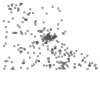

In [529]:
restristedPointList.buffer(0.001)

In [560]:
# remove the segments intersected with restricted point
def isBlackList(arraylike):
    return (restristedPointList.intersects(arraylike['geometry'].buffer(0.0001))) 

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<ipython-input-531-3b8e569aaa6d>:1: ShapelyDeprecationWarning:

__getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



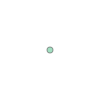

In [531]:
restristedPointList[0]

In [563]:
edges['isBlackList'] = edges.apply(isBlackList, axis=1)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [564]:
len(edges[edges['isBlackList']])

595

In [567]:
edges[edges['isBlackList']].head().index

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Int64Index([255, 257, 258, 259, 260], dtype='int64')

In [574]:
matchedSegList = [[x] for x in edges[edges['isBlackList']].index]

In [578]:
blackSegSet_bridge = set(edges[edges['isBlackList']].index)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [579]:
len(blackSegSet_bridge)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



595

In [575]:
matchedSegList

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[[255],
 [257],
 [258],
 [259],
 [260],
 [559],
 [561],
 [726],
 [859],
 [918],
 [1308],
 [3157],
 [3259],
 [3320],
 [3342],
 [3473],
 [3476],
 [3668],
 [4321],
 [4375],
 [5123],
 [5152],
 [5158],
 [5183],
 [5276],
 [5279],
 [5464],
 [5676],
 [5679],
 [5842],
 [5939],
 [5944],
 [5971],
 [6101],
 [6133],
 [6148],
 [6327],
 [6364],
 [6382],
 [6406],
 [6410],
 [7725],
 [8688],
 [9076],
 [9077],
 [9378],
 [9949],
 [42384],
 [42388],
 [42435],
 [42438],
 [42451],
 [42455],
 [42490],
 [42495],
 [42890],
 [42896],
 [42990],
 [43186],
 [43559],
 [43575],
 [43591],
 [43763],
 [43776],
 [43877],
 [44029],
 [44173],
 [44491],
 [44556],
 [44569],
 [44628],
 [44703],
 [44741],
 [44816],
 [44838],
 [44849],
 [44853],
 [44929],
 [44932],
 [44974],
 [45022],
 [45057],
 [45180],
 [45212],
 [45385],
 [45491],
 [45593],
 [45741],
 [46263],
 [46542],
 [46564],
 [46568],
 [46710],
 [46767],
 [46772],
 [46914],
 [46991],
 [47115],
 [47465],
 [47574],
 [47597],
 [47651],
 [47851],
 [51376],
 [51453],
 [51456

In [576]:
GraphFunctions.plotRoutes(matchedSegList, edges, ['red' for _ in range(len(matchedSegList))], 'bridgeSeg.html')

In [460]:
bridgeRestriction[bridgeRestriction['ON_UNDER']!=1]

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,BRKEY,ON_UNDER,FACILITY,ROADWAY_NAME,FEATURE_INTERSECTED,DISTRICT,COUNTY,CITY - TOWNSHIP,LOCATION DESC,OWNER,...,PERMIT_CODE_60K_CODE,PERMIT_CODE_60K_DESC,PERMIT_CODE_72K_CODE,PERMIT_CODE_72K_DESC,VEHICLE_POSTED_CAPACITY,SEMI_POSTED_CAPACITY,DOUBLE_POSTED_CAPACITY,LATITUDE,LONGITUDE,inBbox


In [442]:
x,y = list(bridgeRestriction['LONGITUDE']), list(bridgeRestriction['LATITUDE'])

In [444]:
len(x)

240

In [445]:
bridgeNodes = ox.distance.get_nearest_nodes(osmGraphInBbox.graph, x, y)

c:\Users\mingzhou\anaconda3\lib\site-packages\osmnx\distance.py:137: ResourceWarning:

unclosed file <_io.TextIOWrapper name='output.txt' mode='r' encoding='cp936'>



In [449]:
matchedNodesGdf = nodes.loc[bridgeNodes,:]

In [450]:
matchedNodesGdf

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,y,x,osmid,highway,ref,geometry,indexId,elevation
186326540,45.402921,-93.420197,186326540,NaN,NaN,POINT (-93.42020 45.40292),186326540,277.82056
250848922,45.192887,-93.195201,250848922,NaN,NaN,POINT (-93.19520 45.19289),250848922,273.73999
250954085,45.182114,-93.195476,250954085,NaN,NaN,POINT (-93.19548 45.18211),250954085,274.48001
186342826,45.807331,-93.824807,186342826,NaN,NaN,POINT (-93.82481 45.80733),186342826,366.13788
186338047,45.764711,-94.203897,186338047,NaN,NaN,POINT (-94.20390 45.76471),186338047,318.70837
...,...,...,...,...,...,...,...,...
187658463,44.107749,-92.318955,187658463,NaN,NaN,POINT (-92.31896 44.10775),187658463,344.11563
187515327,45.692650,-93.740373,187515327,NaN,NaN,POINT (-93.74037 45.69265),187515327,324.22049
7019937781,44.871453,-93.418711,7019937781,turning_circle,NaN,POINT (-93.41871 44.87145),7019937781,266.17877
188034716,44.575313,-93.282150,188034716,NaN,NaN,POINT (-93.28215 44.57531),188034716,330.54044


In [451]:
matchedPointList = list(zip(list(matchedNodesGdf['y']), list(matchedNodesGdf['x'])))
GraphFunctions.plotPointList({'restrict nodes':  matchedPointList}, ['red'], 'test.html')

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [580]:
blackSegSet_bridge+blackSegSet

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TypeError: unsupported operand type(s) for +: 'set' and 'set'

In [581]:
blackList = blackSegSet_bridge.union(blackSegSet)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [582]:
len(blackList)

769

In [583]:
with open('blacklistSegments.txt','w') as f:
   f.write(str(blackList))

In [584]:
import ast
with open('blacklistSegments.txt','r') as f:
   blackList = ast.literal_eval(f.read())

In [585]:
len(blackList)

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



769

In [588]:
45057 in blackList

c:\Users\mingzhou\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



True